- ## 2.Problem Statement :  perform  Market Basket Analysis for food purchase data to uncover associations between food items.

- #### Strategy : Association Rule(Apriori Alogorithm)
- #### Data : Food purchase data about 7501 rows.

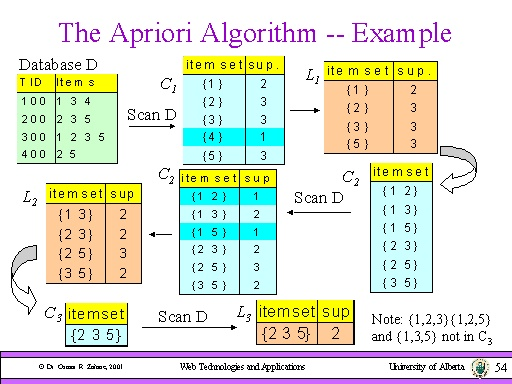

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx
from apyori import apriori
import warnings
warnings.filterwarnings('ignore')
df=pd.read_excel('C:/datalake/project_retail/master_dataset.xlsx', sheet_name='food_items',encoding = 'unicode_escape',header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Vizulisations

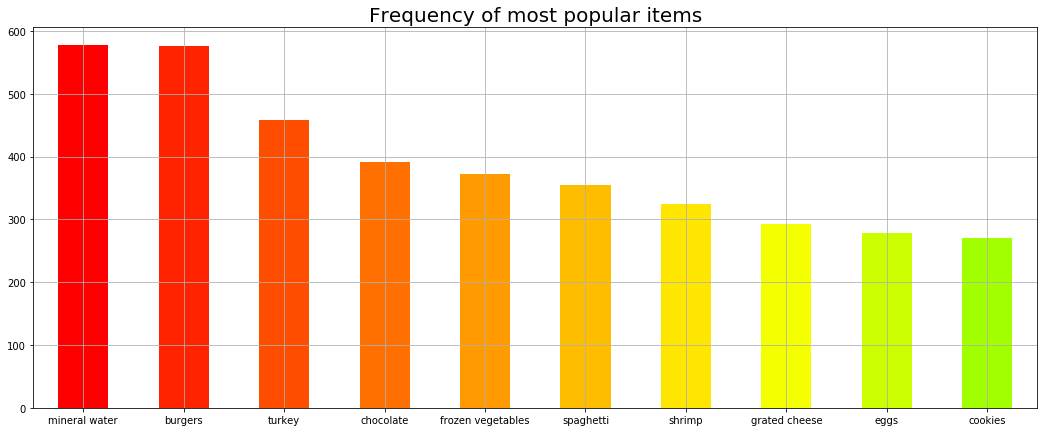

In [228]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.hsv(np.linspace(0, 1, 40))
df[0].value_counts().head(10).plot.bar(color = color)
plt.title('Frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 0)
plt.grid()
plt.show()

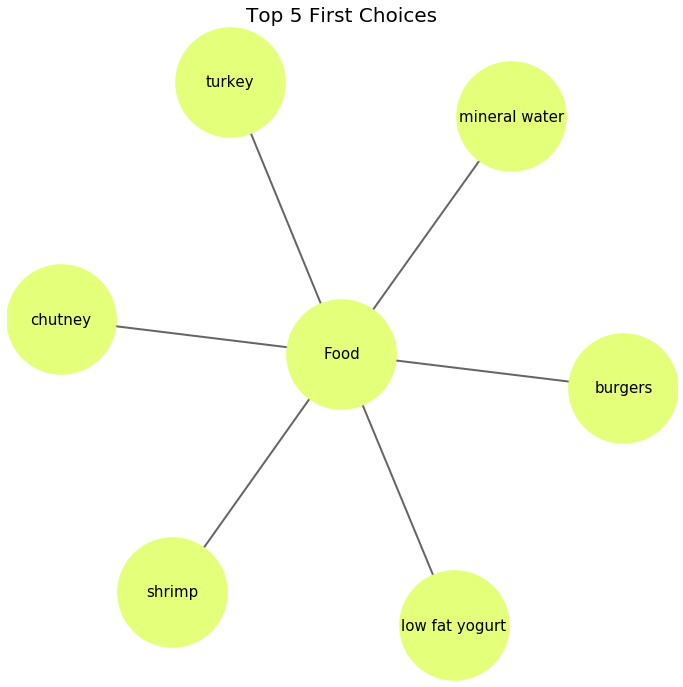

In [229]:
df['food'] = 'Food'
food = df.truncate(before = -1, after = 5)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)
plt.rcParams['figure.figsize'] = (12, 12)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 5, 1))
nx.draw_networkx_nodes(food, pos, node_size = 12000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 2, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 15, font_family = 'sans-serif')
plt.axis('off')
plt.title('Top 5 First Choices', fontsize = 20)
plt.show()

### Making list from pandas Dataframe

In [230]:
transactions = []
for i in range(0, 7501):
    transactions.append([str(df.values[i,j]) for j in range(0, 20)])

In [231]:
print(*transactions[0])

shrimp almonds avocado vegetables mix green grapes whole weat flour yams cottage cheese energy drink tomato juice low fat yogurt green tea honey salad mineral water salmon antioxydant juice frozen smoothie spinach olive oil


## Important terms of Markrt Basket analysis

- #### 1.Support. This says how popular an itemset is, it is number of times appear in total number of transaction. in other word we say frequency of item.

- #### 2.Confidence. This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.

- #### 3.Lift. it is ratio of expected confidance to observed confidance.it is described as confidance of Y when item X was already known(x/y) to the confidance of Y when X item is unknown. in other words confidance of Y w.r.t. x and confiadnce of Y without X (means both are independent to each other).

 ### The choosing Hyperparameters Support,Comfidence,Lift.

In [232]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)
results = list(rules)

In [233]:
results[0]

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

### Making List wise Support,Confidence,Lift

### for support 

In [235]:
#making list wise support
support = []
asscociation= []
for i in range (0, len(results)):
    support.append(results[:len(results)][i][1])
    asscociation.append(list(results[:len(results)][i][0]))
    
# making datafreme for support   
df1 = pd.DataFrame([asscociation, support]).T
df1.columns = ['asscociation', 'support']
df1.head(3)

,asscociation,support
0,"[chicken, light cream]",0.00453273
1,"[escalope, mushroom cream sauce]",0.00573257
2,"[escalope, pasta]",0.00586588


### for Confidence

In [236]:
#making list wise confidence
confidence = []
asscociation= []
for i in range (0, len(results)):
    confidence.append(results[:len(results)][i][2][0][2])
    asscociation.append(list(results[:len(results)][i][0]))
    
# making datafreme for confidence   
df2 = pd.DataFrame([asscociation, confidence]).T
df2.columns = ['asscociation', 'confidence']
df2.head(3)

,asscociation,confidence
0,"[chicken, light cream]",0.290598
1,"[escalope, mushroom cream sauce]",0.300699
2,"[escalope, pasta]",0.372881


### for Lift

In [237]:
#making list wise lift score
lift = []
asscociation= []
for i in range (0, len(results)):
    lift.append(results[:len(results)][i][2][0][3])
    association.append(list(results[:len(results)][i][0]))

#making datafreme for Lift 
df3 = pd.DataFrame([association, lift]).T
df3.columns = ['Association', 'Lift']
df3.head(3)

,Association,Lift
0,"[chicken, light cream]",4.84395
1,"[escalope, mushroom cream sauce]",3.79083
2,"[escalope, pasta]",4.70081


### another way of result...

### all parameters with each set.

In [238]:
results[0]

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

In [239]:
for item in results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: chicken -> light cream
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: escalope -> mushroom cream sauce
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: fromage blanc -> honey
Support: 0.003332888948140248
Confidence: 0.2450980392156863
Lift: 5.164270764485569
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: ground beef -> tomato sauce
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: olive oil -> light cream
Support: 0.003199573390214638
Confidence: 0.20512820512820515
Lift: 3.1147098515519573
Rule: olive oil -> whole wheat pasta
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confide




## End of Notebook...